In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Scientist DN/Uber-2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#check datatype it's an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [ ]:
#replacing * in column name with ""
df.columns = df.columns.str.replace("*","")
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
#deleting 1155th row
df.drop(index=1155,inplace=True)

In [ ]:
#chechking number of null value
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
#forward filling in place of null values
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [ ]:
#chechking number of null value
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
#correcting 'START_DATE' & 'END_DATE format and if any of the date is not correctable than fill it to NA and continues execution
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
#frequency of all start locations
start = df['START'].value_counts()
start[start>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

In [ ]:
#frequency of all stop locations
stop = df['STOP'].value_counts()
stop[stop>10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

In [ ]:
#miles 
miles = df.MILES.value_counts()
miles[miles>10]
#miles>10

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64

Text(0.5, 1.0, 'most frequesnt booked miles')

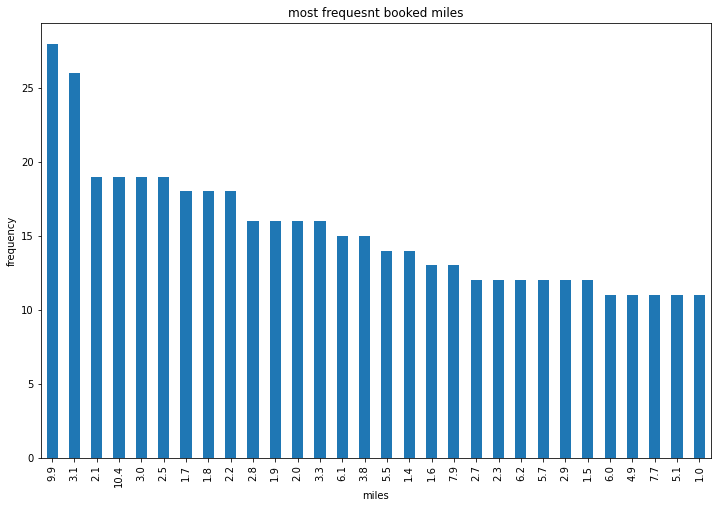

In [ ]:
plt.figure(figsize = [12,8]) #resize size
miles[miles>10].plot(kind='bar') #plot bar chart
plt.xlabel('miles')
plt.ylabel('frequency')
plt.title('most frequesnt booked miles')

In [ ]:
df['PURPOSE'].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     197
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [ ]:
df['MILES']>10

0       False
1       False
2       False
3       False
4        True
        ...  
1151    False
1152     True
1153    False
1154     True
1155     True
Name: MILES, Length: 1156, dtype: bool

In [ ]:
df[df['MILES']>10]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting
22,2016-01-12 16:02:00,2016-01-12 17:00:00,Business,New York,Queens County,15.1,Meeting
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2,Meeting
...,...,...,...,...,...,...,...
1134,2016-12-29 11:28:00,2016-12-29 12:00:00,Business,Unknown Location,Kar?chi,11.9,Meal/Entertain
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
df.groupby(['PURPOSE'])['MILES'].mean()

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      72.913198
Name: MILES, dtype: float64

In [ ]:
# Mean, min, and max values of 'MILES' grouped by Salesman id 
df.groupby(['PURPOSE']).agg({'MILES':['mean',max,min]})

MILES                
                       mean      max    min
PURPOSE                                    
Airport/Travel    14.953704    156.9    0.9
Between Offices   10.944444     39.2    1.9
Charity ($)       15.100000     15.1   15.1
Commute          180.200000    180.2  180.2
Customer Visit    16.065806    310.3    0.6
Errand/Supplies    5.928902    195.3    0.5
Meal/Entertain     5.773878     36.5    0.6
Meeting           12.652597    201.0    0.7
Moving             4.550000      6.1    3.3
Temporary Site    72.913198  12204.7    0.7

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

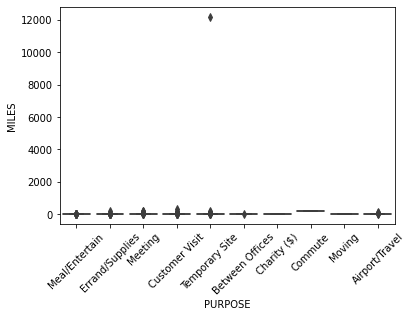

In [ ]:
sns.boxplot(data = df, x = df.PURPOSE, y = df.MILES)
plt.xticks(rotation = 45)

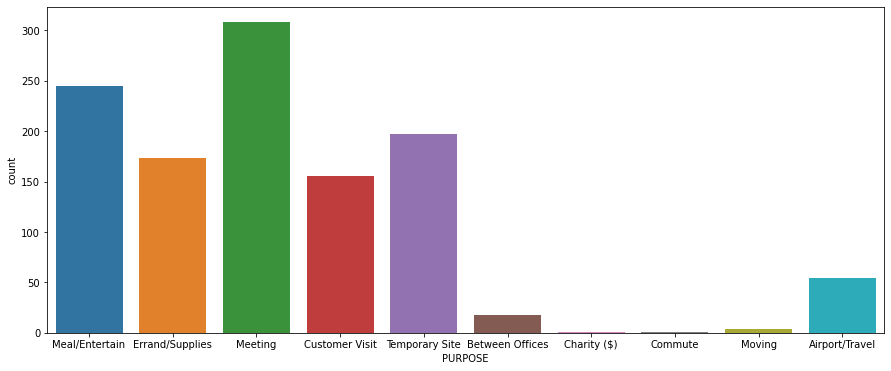

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(df['PURPOSE'])

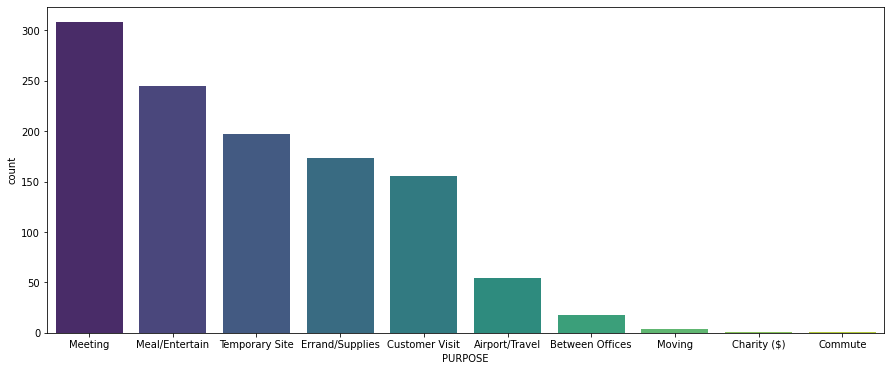

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index, palette = 'viridis')

In [ ]:
df['PURPOSE'].value_counts().index

Index(['Meeting', 'Meal/Entertain', 'Temporary Site', 'Errand/Supplies',
       'Customer Visit', 'Airport/Travel', 'Between Offices', 'Moving',
       'Charity ($)', 'Commute'],
      dtype='object')

In [ ]:
df['MINUTES'] = df.END_DATE - df.START_DATE
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,0 days 01:43:00


In [ ]:
df['MINUTES'] = df['MINUTES'].dt.total_seconds()/60

In [ ]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0


In [ ]:
#cheching minutes datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   MINUTES     1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 72.4+ KB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

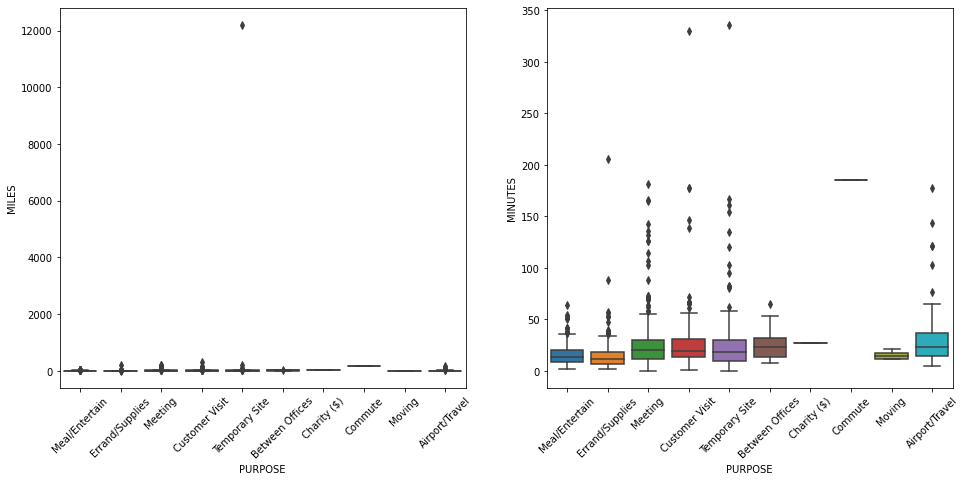

In [ ]:
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

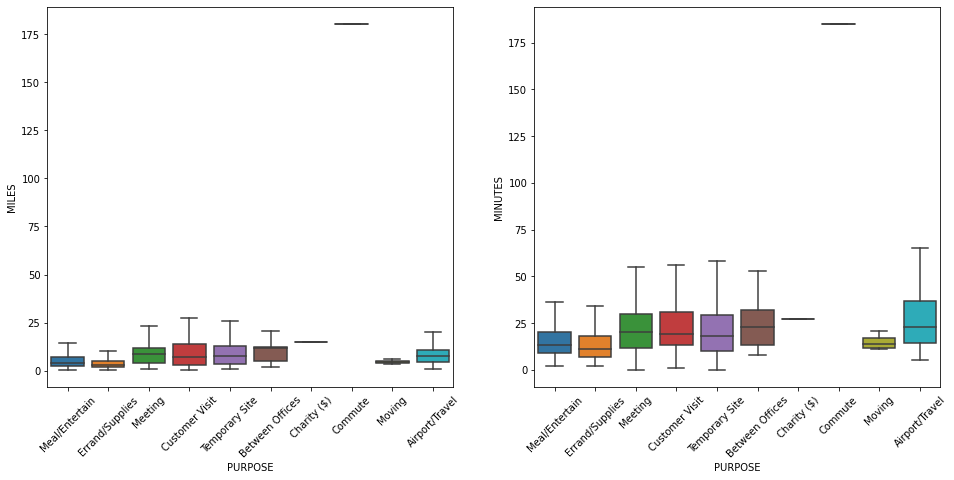

In [ ]:
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45)

In [ ]:
#road trip

In [ ]:
# month column
df['month'] = pd.DatetimeIndex(df['START_DATE']).month
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1.0
...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,12.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,12.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,12.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,12.0


In [ ]:
dic = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'june', 7: 'july', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
df['month'] = df['month'].map(dic)

In [ ]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,jan
...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,dec
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,dec


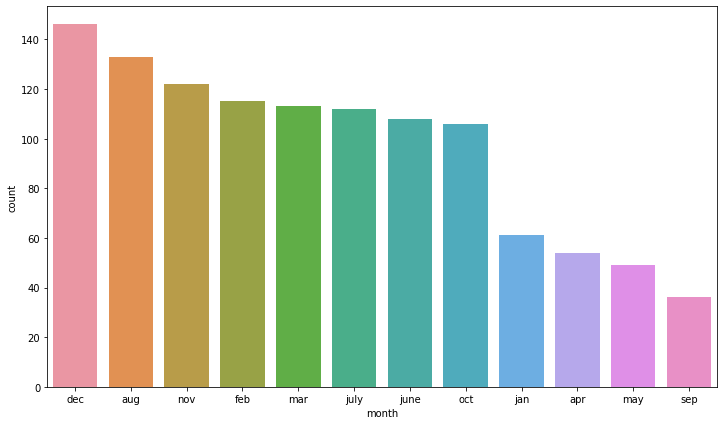

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(df['month'],order=df['month'].value_counts().index)

In [ ]:
# which month is having more round trips
def round(x):
  if x['START'] == x['STOP']:
    return 'yes' # 0
  else:
    return 'no' # 1



In [ ]:
df['Round_trip'] = df.apply(round, axis = 1)

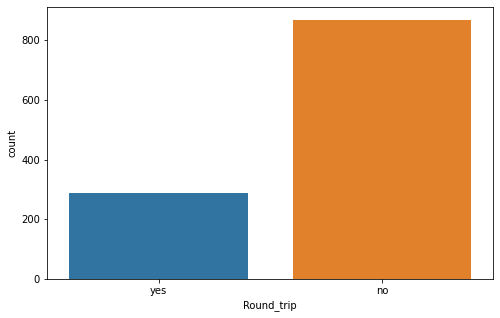

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['Round_trip'])

In [ ]:
df['Round_trip'].value_counts()

no     868
yes    288
Name: Round_trip, dtype: int64

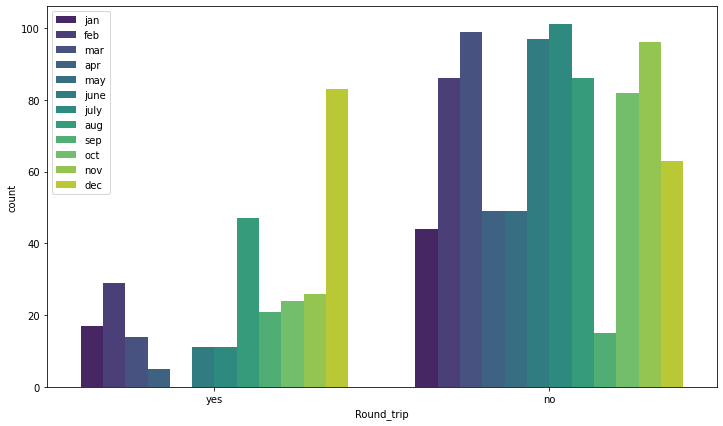

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['Round_trip'], hue = df['month'], palette = 'viridis')
plt.legend() # because of two (more or Nan) values (which color depicts to which month)

In [ ]:
# Another way of doing above thing
df.groupby(['month','Round_trip'])['Round_trip'].count()

month  Round_trip
apr    no             49
       yes             5
aug    no             86
       yes            47
dec    no             63
       yes            83
feb    no             86
       yes            29
jan    no             44
       yes            17
july   no            101
       yes            11
june   no             97
       yes            11
mar    no             99
       yes            14
may    no             49
nov    no             96
       yes            26
oct    no             82
       yes            24
sep    no             15
       yes            21
Name: Round_trip, dtype: int64

In [ ]:
df.groupby(['month','Round_trip']).agg({'Round_trip' : 'count'})

Round_trip
month Round_trip            
apr   no                  49
      yes                  5
aug   no                  86
      yes                 47
dec   no                  63
      yes                 83
feb   no                  86
      yes                 29
jan   no                  44
      yes                 17
july  no                 101
      yes                 11
june  no                  97
      yes                 11
mar   no                  99
      yes                 14
may   no                  49
nov   no                  96
      yes                 26
oct   no                  82
      yes                 24
sep   no                  15
      yes                 21

In [ ]:
a = df.groupby(['month','Round_trip']).agg({'Round_trip' : 'count'})
a.columns = ['countdata']
a = a.reset_index()

In [ ]:
a[a['Round_trip'] == 'yes'].sort_values(by = ['month', 'countdata'],ascending = False)

,month,Round_trip,countdata
22,sep,yes,21
20,oct,yes,24
18,nov,yes,26
15,mar,yes,14
13,june,yes,11
11,july,yes,11
9,jan,yes,17
7,feb,yes,29
5,dec,yes,83
3,aug,yes,47


In [ ]:
pd.set_option('display.max_rows',None) # to display all columns
df[df['month'] == 'dec'].groupby(['PURPOSE','month','Round_trip'])['START'].count()

PURPOSE          month  Round_trip
Airport/Travel   dec    yes            2
Between Offices  dec    yes            1
Customer Visit   dec    no            16
                        yes           10
Errand/Supplies  dec    no            11
                        yes           36
Meal/Entertain   dec    no            18
                        yes           13
Meeting          dec    no            12
                        yes           18
Temporary Site   dec    no             6
                        yes            3
Name: START, dtype: int64

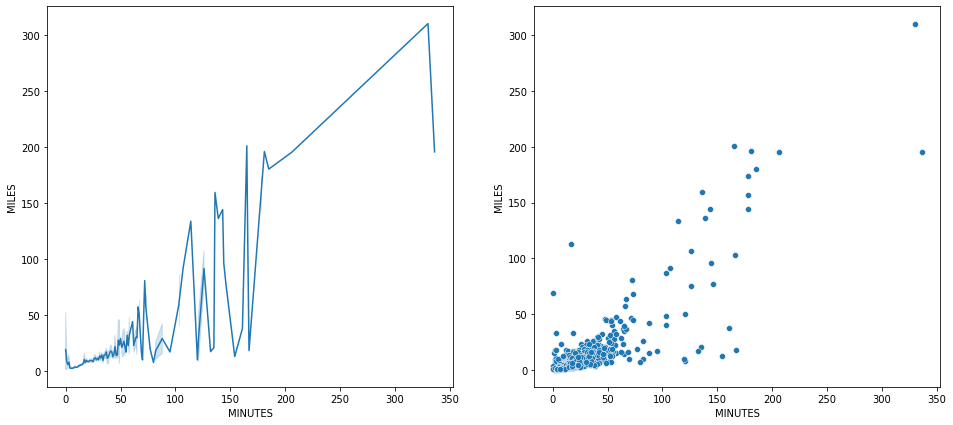

In [ ]:
# line plot or scatter plot - x-axis = minutes and on y- axis = miles
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)

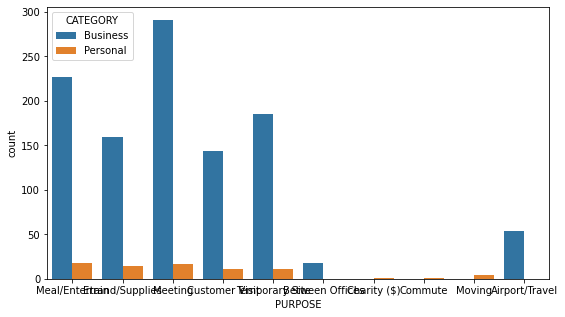

In [ ]:
# business or personal category
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'PURPOSE', hue = 'CATEGORY')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

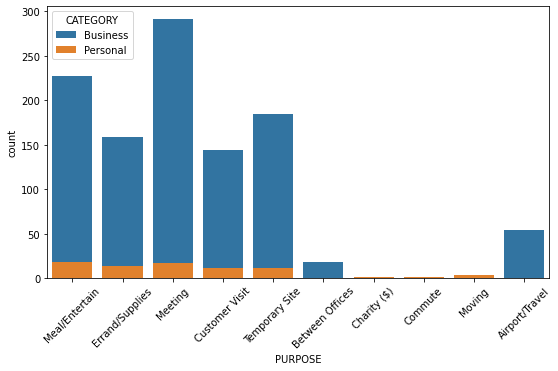

In [ ]:
# business or personal category
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'PURPOSE', hue = 'CATEGORY', dodge = False)
plt.xticks(rotation=45)

In [ ]:
df.groupby(['CATEGORY','START'])['START'].count()

CATEGORY  START                     
Business  Agnew                           4
          Almond                          1
          Apex                           17
          Arabi                           1
          Arlington                       1
          Arlington Park at Amberly       1
          Asheville                       2
          Austin                          1
          Banner Elk                      1
          Bellevue                        1
          Berkeley                       16
          Briar Meadow                    1
          Bryson City                     5
          Burtrose                        1
          CBD                             4
          Capitol One                     2
          Cary                          198
          Central                         8
          Chalmette                       1
          Chapel Hill                     2
          Chessington                     1
          College Avenue               

In [ ]:
#sorting above data
a = df.groupby(['CATEGORY','START']).agg({'START' : 'count'})
a.columns = ['countdata']
a.reset_index()

,CATEGORY,START,countdata
0,Business,Agnew,4
1,Business,Almond,1
2,Business,Apex,17
3,Business,Arabi,1
4,Business,Arlington,1
5,Business,Arlington Park at Amberly,1
6,Business,Asheville,2
7,Business,Austin,1
8,Business,Banner Elk,1
9,Business,Bellevue,1


In [ ]:
a.reset_index().sort_values(by=['CATEGORY', 'countdata'], ascending=False)

,CATEGORY,START,countdata
201,Personal,Whitebridge,9
169,Personal,Banner Elk,7
183,Personal,Kissimmee,6
187,Personal,Morrisville,6
180,Personal,Islamabad,5
190,Personal,Orlando,4
191,Personal,Preston,4
171,Personal,Cary,3
170,Personal,Boone,2
173,Personal,Couples Glen,2


In [ ]:
df.groupby(['CATEGORY',])['MILES'].mean()

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64